## Description
In this notebook, we compare SIEVE-STREAMING++ with SIEVE-STREAMING and PREEMPTION-STREAMING, the two existing standard approaches for monotone k-cardinality submodular streaming. We evaluate the performance of these algorithms based on utility and memory complexity.

All the algorithms of the paper (single-source and multi-source settings) and required utility functions are implemented in "icml2019.py".

In [1]:
from icml2019 import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We then load one of the two existing datasets.
The SIEVE-STREAMING++ algorithm is implemented by the sieveStreamingPlusPlus(stream, k, eps, function) where:
  <li>__"stream"__ is the input data stream.</li>
  <li>__"k"__ is the cardinality constraint $k$</li>
  <li>__"eps"__ is the error the granularity term $\varepsilon$.</li>
  <li>__"function"__ is the non-negative monotone submodular function $f$</li>

Similarly SIEVE-STREAMING and PREEMPTION-STREAMING are implemented by sieveStreaming(stream,k,eps,function) and preemptionStreaming(stream,k,c,function). For the PREEMPTION-STREAMING algorithm $c=1$ gives the best approximation factor (Buchbinder et al., 2015).

# Parameters
<li>$k = 10$</li>
<li>$\varepsilon = 0.5$</li>
<li>$c = 1$</li>

In [2]:
k = 10 #Note that the PREEMPTION-STREAMING is very slow 
eps = 0.7
c = 1

<li>__"tweets.txt"__ is the set of twitts where each line is: [handle,cleanedWords,retweets/words,date,text]</li>
<li>__"YouTube_vectors.txt"__ is set of vectors representing </li>

In [3]:
Dataset = "tweets.txt" #encoded features of YouTubeframes
tweets,M = loadTwitterData(Dataset)
stream = createSimpleStream(tweets) #Given a list of tweets of format, outputs a list of elements, sorted by arrival time (date).

"__tweetDiversity(set)__" is the submodular routine used for twitter data stream.

In [4]:
function = tweetDiversity

In [5]:
answer_sieveStreamingPlusPlus,  memory_sieveStreamingPlusPlus = sieveStreamingPlusPlus(stream, k, eps, function)
answer_sieveStreaming,  memory_sieveStreaming = sieveStreaming(stream, k, eps, function)
answer_preemptionStreaming = preemptionStreaming(stream,k,c,function)

In [6]:
sieveplusplus = [function(answer_sieveStreamingPlusPlus), max(memory_sieveStreamingPlusPlus)]
sieve = [function(answer_sieveStreaming), max(memory_sieveStreaming)]
preemption = [function(answer_preemptionStreaming), k]
max_utility = max(sieveplusplus[0], sieve[0] , preemption[0]) #Max Utility
max_memory = max(sieveplusplus[1], sieve[1] , preemption[1]) * 1.0 #Max Memory
sieveplusplus = [sieveplusplus[0] / max_utility, sieveplusplus[1] / max_memory] #Normalaize
sieve = [sieve[0] / max_utility, sieve[1] / max_memory] #Normalaize
preemption = [preemption[0] / max_utility, preemption[1] / max_memory] #Normalaize

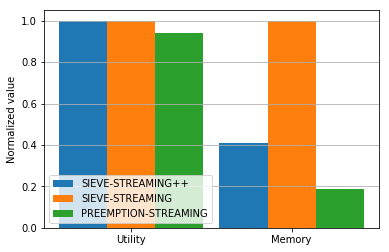

In [7]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
N = 2
ind = np.arange(N)  
width = 0.3
rects1 = ax.bar(ind, sieveplusplus, width,capsize=4)
rects2 = ax.bar(ind + width, sieve, width, capsize=4)
rects3 = ax.bar(ind + 2 * width, preemption, width, capsize=4)
ax.set_ylabel('Normalized value')
ax.set_xticks(ind +  width)
ax.set_xticklabels(('Utility', 'Memory'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('SIEVE-STREAMING++', 'SIEVE-STREAMING', 'PREEMPTION-STREAMING'), loc = 3)
plt.gca().yaxis.grid(True)


# Trade-off between memory and epsilon

In [8]:
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8]
k = 10
sieveStreamingPlusPlus_memories = []
sieveStreamingPlusPlus_utilities = []
for eps in epsilons:
    answer_sieveStreamingPlusPlus,  memory_sieveStreamingPlusPlus = sieveStreamingPlusPlus(stream, k, eps, function)
    sieveStreamingPlusPlus_utilities.append(function(answer_sieveStreamingPlusPlus))
    sieveStreamingPlusPlus_memories.append(max(memory_sieveStreamingPlusPlus))
sieveStreaming_memories = []
sieveStreaming_utilities = []
for eps in epsilons:
    answer_sieveStreaming,  memory_sieveStreaming = sieveStreaming(stream, k, eps, function)
    sieveStreaming_utilities.append(function(answer_sieveStreaming))
    sieveStreaming_memories.append(max(memory_sieveStreaming))

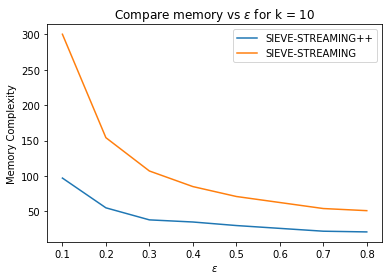

In [9]:
plt.plot(epsilons, sieveStreamingPlusPlus_memories, label="SIEVE-STREAMING++")
plt.plot(epsilons, sieveStreaming_memories, label="SIEVE-STREAMING")
plt.xlabel("$\epsilon$")
plt.ylabel("Memory Complexity")
plt.title("Compare memory vs $\epsilon$ for k = " + str(k))
plt.legend(loc = 1)

SIEVE-STREAMING++ and SIEVE-STREAMING++ have exactly the same utility.

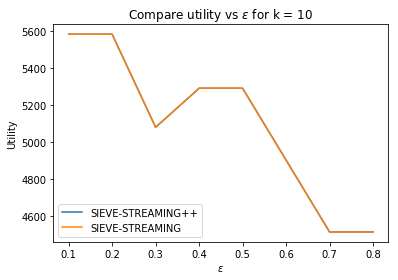

In [10]:
plt.plot(epsilons, sieveStreamingPlusPlus_utilities, label="SIEVE-STREAMING++")
plt.plot(epsilons, sieveStreaming_utilities, label="SIEVE-STREAMING")
plt.xlabel("$\epsilon$")
plt.title("Compare utility vs $\epsilon$ for k = " + str(k))
plt.ylabel("Utility")
plt.legend(loc = 3)